# 라이브러리를 불러옵니다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 데이터 셋 로드 

In [4]:
import glob 

In [5]:
path = glob.glob('*.csv')
path

['pets_cleansed.csv']

In [6]:
df = pd.read_csv(path[0], encoding = 'utf-8')
df

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5669,프렌치불독,1,0.8,4.0,M,N,흑,260.0,1,0,소,0
5670,프렌치불독,0,0.5,3.5,M,N,검정,227.5,1,0,소,0
5671,프렌치불독,0,0.5,5.2,M,N,"백색, 갈색, 흑색",338.0,1,0,소,0
5672,화이트테리어,13,0.5,7.3,F,Y,흰,474.5,0,1,소,0


# 데이터 살펴보기 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   품종        5674 non-null   object 
 1   나이        5674 non-null   int64  
 2   산책시간(시간)  5674 non-null   float64
 3   체중        5674 non-null   float64
 4   성별        5674 non-null   object 
 5   중성화여부     5674 non-null   object 
 6   색상        5674 non-null   object 
 7   음수량       5674 non-null   float64
 8   성별_라벨링    5674 non-null   int64  
 9   중성화_라벨링   5674 non-null   int64  
 10  크기        5674 non-null   object 
 11  크기_라벨링    5674 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 532.1+ KB


In [8]:
df.describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링
count,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000
mean,1.955939,0.892510,7.444949,483.921678,0.649806,0.087769,0.346493
std,2.603371,0.163133,6.894764,448.159680,0.477073,0.282983,0.610848
min,0.000000,0.500000,0.040000,2.600000,0.000000,0.000000,0.000000
25%,0.000000,0.800000,2.655000,172.575000,0.000000,0.000000,0.000000
50%,1.000000,0.800000,5.000000,325.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,10.000000,650.000000,1.000000,0.000000,1.000000
max,18.000000,1.500000,60.000000,3900.000000,1.000000,1.000000,2.000000


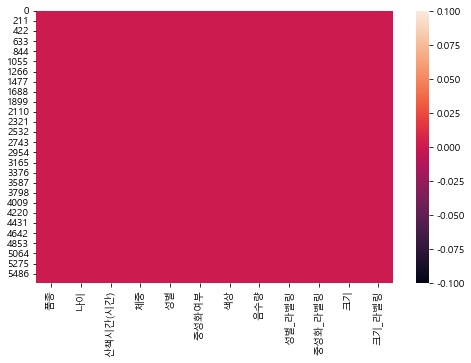

In [9]:
#결측치 시각회
plt.figure(figsize = (8, 5))
sns.heatmap(df.isnull())
plt.show()

# 각 컬럼 별 히스토그램 그려서 데이터 분포 보기 
df.hist(figsize = (12,8))
plt.show()

# 범주형 변수 제외 - 전처리

In [10]:
df.columns

Index(['품종', '나이', '산책시간(시간)', '체중', '성별', '중성화여부', '색상', '음수량', '성별_라벨링',
       '중성화_라벨링', '크기', '크기_라벨링'],
      dtype='object')

In [11]:
#범주형 변수들은 제외하고 새로운 변수로 선언
C1 = df[['나이','산책시간(시간)', '체중', '성별_라벨링',
       '중성화_라벨링','크기_라벨링', '음수량']]

In [12]:
#잘 담겨있는지 확인
C1

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량
0,13,0.5,27.0,1,0,2,1755.0
1,10,0.5,25.0,0,0,2,1625.0
2,9,0.5,40.0,1,0,2,2600.0
3,8,0.5,28.0,0,0,2,1820.0
4,8,0.5,33.0,1,0,2,2145.0
...,...,...,...,...,...,...,...
5669,1,0.8,4.0,1,0,0,260.0
5670,0,0.5,3.5,1,0,0,227.5
5671,0,0.5,5.2,1,0,0,338.0
5672,13,0.5,7.3,0,1,0,474.5


# Feature Selection

## 상관분석

In [13]:
C1.corr()

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량
나이,1.000000,-0.056727,0.283098,0.097001,0.366550,0.202140,0.283098
산책시간(시간),-0.056727,1.000000,0.537268,0.047376,-0.064798,0.477659,0.537268
체중,0.283098,0.537268,1.000000,0.127471,0.012856,0.916428,1.000000
성별_라벨링,0.097001,0.047376,0.127471,1.000000,0.183315,0.110984,0.127471
중성화_라벨링,0.366550,-0.064798,0.012856,0.183315,1.000000,-0.034216,0.012856
크기_라벨링,0.202140,0.477659,0.916428,0.110984,-0.034216,1.000000,0.916428
음수량,0.283098,0.537268,1.000000,0.127471,0.012856,0.916428,1.000000


<AxesSubplot:>

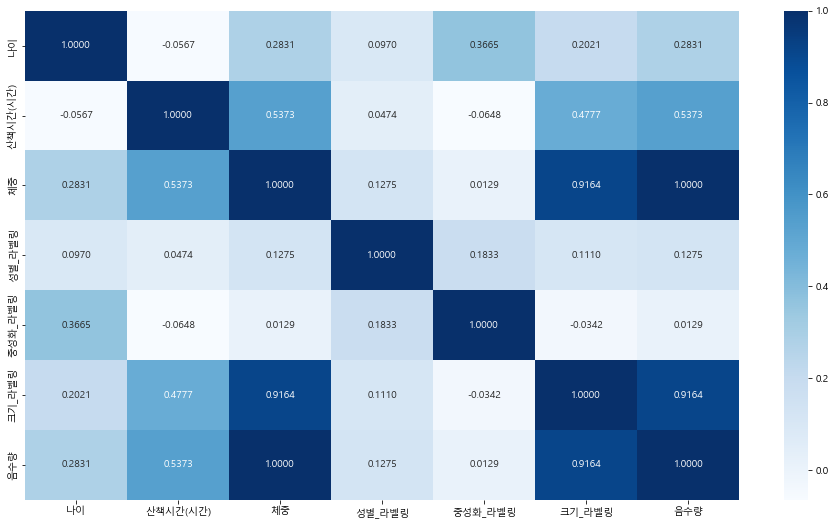

In [14]:
plt.figure(figsize = (16,9))

sns.heatmap(data = C1.corr(),
           cmap = 'Blues', 
           annot = True, fmt = '0.4f')

In [15]:
corr_bar = []

for column in C1.columns:
    print(f"{column}과 크기의 상관관계:{C1[column].corr(C1['크기_라벨링'])}")
    corr_bar.append(C1[column].corr(C1['크기_라벨링']))

나이과 크기의 상관관계:0.2021404585500324
산책시간(시간)과 크기의 상관관계:0.47765942510271586
체중과 크기의 상관관계:0.9164284511703006
성별_라벨링과 크기의 상관관계:0.1109842052361599
중성화_라벨링과 크기의 상관관계:-0.03421605948347803
크기_라벨링과 크기의 상관관계:1.0
음수량과 크기의 상관관계:0.9164284511703032


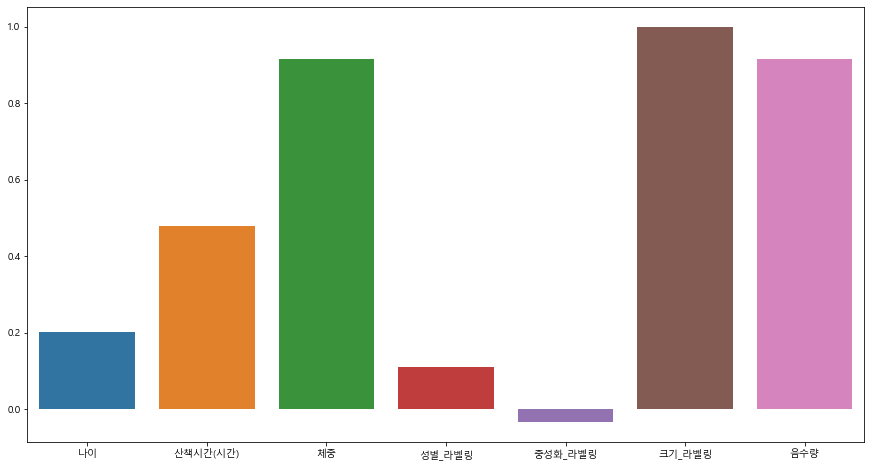

In [16]:
plt.figure(figsize = (15,8))
sns.barplot(C1.columns, corr_bar)
plt.show()

In [17]:
# 반려동물 데이터는 7개의 차원으로 이루어져 있음 
print(C1.shape)

(5674, 7)


# ElbowPoint

In [18]:
# 군집화 라이브러리 불러오기 .
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [19]:
y = C1['크기_라벨링']

In [20]:
data = C1.drop(['크기_라벨링'], axis = 1)

In [21]:
kmc = KMeans(n_clusters = 3,
             init = 'random',
             max_iter = 100,
             random_state = 0)
kmc.fit(data)
label_kmc = kmc.labels_

In [22]:
kmc_columns = ['kmc_comp1','kmc_comp2']
data_kmc_df = pd.DataFrame(data, columns = kmc_columns)
data_kmc_df['target'] = y
data_kmc_df['label_kmc'] = label_kmc
data_kmc_df

,kmc_comp1,kmc_comp2,target,label_kmc
0,NaN,NaN,2,2
1,NaN,NaN,2,2
2,NaN,NaN,2,2
3,NaN,NaN,2,2
4,NaN,NaN,2,2
...,...,...,...,...
5669,NaN,NaN,0,0
5670,NaN,NaN,0,0
5671,NaN,NaN,0,0
5672,NaN,NaN,0,0


In [23]:
# 그래프 그리기
plt.figure(figsize = (15,8))
plt.plot(x, y)
plt.show()

NameError: name 'x' is not defined

<Figure size 1080x576 with 0 Axes>

In [ ]:
#정규화 진행 및 객체 생성
scaler = StandardScaler()

In [ ]:
#데이터 학습 
scaler.fit(data)

In [ ]:
scaler_data = scaler.transform(data)

In [ ]:
#객체생성 (2개의 객체 만들것임)
pca = PCA(n_components = 2)

In [ ]:
pca.fit(scaler_data)

In [ ]:
pca.transform(scaler_data)

In [ ]:
#2개의 피쳐로 학습된 데이터를 데이터프레임 형태로 변환해주자 
data = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data.head()

In [ ]:
x = [] #k가 몇개인지 -
y = [] #응집도가 몇인지 

# 범위가 1~30인 이유
for k in range (1,30): 
    kmeans = KMeans(n_clusters = k) # 1~ 29개의 군집화 된 객체를 kmeans라고 함   
    kmeans.fit(data)               # kmeans에다가 data2를 학습시킬것임 
    
    x.append(k)
    y.append(kmeans.inertia_)

    
#k가 n개 일 때 응집도는 a라고 이해하면 된다 

In [ ]:
#그래프 그리기
plt.plot(x,y)

In [ ]:
# 3개로 군집화 된 객체를 생성 
kmeans = KMeans(n_clusters = 3)

In [ ]:
# 군집화 할 데이터 'data'를 학습시키기 
kmeans.fit(data)

In [ ]:
# 학습된 kmeans의 응집도 확인 (각 데이터로부터 자신이 속한 군집의 중심까지의 거리)
# 응집도가 낮을수록 군집화가 더 잘되어있는 것이다

In [ ]:
# 학습된 데이터를  labels 라는 컬럼에 넣어주자 
data['labels'] = kmeans.predict(data)

In [ ]:
data.head()

In [ ]:
# 위의 값들을 시각화 할거고 그래서 pca를 만든것 

In [ ]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data)